# **Music Genre Classification**

Nome dos integrantes:


*   André Gonçalves
*   Vitor Anastacio
*   Victor Goraieb
*   Danitiele
*   Luísa 



Inicialmente, foram fornecidas as seguintes bases de dados: uma coleção com 1.000 áudios, arquivos de imagem com representação visual dos áudios, que foram convertidos em espectogramas de Mel e conjunto de features.

A base de dados contém 1.000 áudios com 30 segundos cada. Contemplando 10 estilos diferentes (blues, música clássica, country, disco, hip hop, jazz, metal, pop, reggae e rock), com 100 áudios para cada classe. Assim, este projeto visa classificar o estilo musical a partir de trechos de músicas.
Primeiramente, foi realizada a inspeção dos dados, o arquivo de possui 1000 observações com 59 features e uma coluna de target, todas as features são numéricas. O conjunto inicial não continha dados faltantes (NA).

O conjunto de dados não apresenta uma pré-divisão. Dessa forma, foi necessária a separação dos dados em um conjunto de treino, de validação e de teste da seguinte maneira:
Treino: 80%
Validação: 15%
Teste: 5%

Verificou-se o balanceamento entre as classes do conjunto de dados e também a correlação entre todas as features.


### 1. **Download dos dados**

Abaixo, as células fazem o download dos dados e configuração do ambiente de desenvolvimento

**1.1 Download e upload da chave de acesso:** [kaggle.json](https://moodle.lab.ic.unicamp.br/moodle/pluginfile.php/27528/mod_resource/content/1/Tutorial%20-%20Download%20de%20Bases%20no%20Google%20Colab.pdf)

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"victorgoraieb","key":"2478037204315498173ee9cbabe0194a"}'}

**1.2 Instalação das libraries necessárias**

In [ ]:
! pip install kaggle==1.5.6
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

     |████████████████████████████████| 58 kB 5.3 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72857 sha256=1181055a72af0a19264e7bfa6d023498c1379cebfa04e1cc7de13e62d0343b4c
  Stored in directory: /root/.cache/pip/wheels/aa/e7/e7/eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


**1.3 Criação de um diretório para download dos dados e descompressão deles na pasta dataset.**

In [ ]:
!mkdir dataset
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification
! unzip '/content/gtzan-dataset-music-genre-classification.zip' -d '/content/dataset'

100% 1.21G/1.21G [00:20<00:00, 66.2MB/s]
100% 1.21G/1.21G [00:21<00:00, 61.8MB/s]
Archive:  /content/gtzan-dataset-music-genre-classification.zip
  inflating: /content/dataset/Data/features_30_sec.csv  
  inflating: /content/dataset/Data/features_3_sec.csv  
  inflating: /content/dataset/Data/genres_original/blues/blues.00000.wav  
  inflating: /content/dataset/Data/genres_original/blues/blues.00001.wav  
  inflating: /content/dataset/Data/genres_original/blues/blues.00002.wav  
  inflating: /content/dataset/Data/genres_original/blues/blues.00003.wav  
  inflating: /content/dataset/Data/genres_original/blues/blues.00004.wav  
  inflating: /content/dataset/Data/genres_original/blues/blues.00005.wav  
  inflating: /content/dataset/Data/genres_original/blues/blues.00006.wav  
  inflating: /content/dataset/Data/genres_original/blues/blues.00007.wav  
  inflating: /content/dataset/Data/genres_original/blues/blues.00008.wav  
  inflating: /content/dataset/Data/genres_original/blues/blues.000


---
**PERGUNTA - Qual é o problema e quais os tipos de dados estão disponíveis?**: 

Uma coleção com 1.000 áudios, arquivos de imagem com representação visual dos áudios, que foram convertidos em espectogramas de Mel e conjunto de feature.


---
**PERGUNTA - Quais as características disponíveis e como elas estão distribuídas?**: 

Temos 3 opções de conjuntos de dados:


*   CSV com as principais métricas do spectro de áudio das faixas resumidas
*   Arquivos de imagem com o spectro do áudio
*   Arquivos de áudio wav

---
**PERGUNTA - Que tipo de problema iremos lidar? Regressão, classificação, etc.?**: 

Estamos resolvendo um problema de classificação




### 2. **Importação de pacotes e leitura dos dados**

In [ ]:
import numpy as np
import pandas as pd
import os
import wave

In [ ]:
def convert_audio(file_path):

  file = wave.open(file_path)
  data = file.readframes(file.getnframes())
  data = np.frombuffer(data, np.int16)
  
  return data

In [ ]:
file_path = '/content/dataset/Data/genres_original/blues/blues.00000.wav'
frames_values = convert_audio(file_path)
print(len(frames_values))
frames_values

661794


array([  240,   544,   250, ..., -1822, -2001, -2103], dtype=int16)

In [ ]:
folder_path = '/content/dataset/Data/genres_original/'
genre_folders = os.listdir(folder_path)

In [ ]:
file_names = []
file_genre = [] 
file_values = [] 

for genre_folder in genre_folders:
  
  files = os.listdir(folder_path + genre_folder)
  print(genre_folder, len(files))
  
  for audio in files:
    try:
      frames_values = convert_audio(folder_path + genre_folder + '/' + audio)

      file_names.append(audio)
      file_genre.append(genre_folder)
      file_values.append(frames_values)

    except:
      print(audio, 'perdido')

rock 100
reggae 100
pop 100
blues 100
metal 100
country 100
hiphop 100
classical 100
jazz 100
jazz.00054.wav perdido
disco 100


In [ ]:
df_dict = {
    'audio_name' : file_names,
    'wav_values' : file_values,
    'target' : file_genre
}
wavDataFrame = pd.DataFrame(df_dict)

In [ ]:
wavDataFrame.head()

,audio_name,wav_values,target
0,rock.00062.wav,"[2052, 1960, 1902, 1968, 1754, 2107, 2050, 140...",rock
1,rock.00018.wav,"[-2168, -2797, 245, 706, 2142, 2230, -227, 887...",rock
2,rock.00067.wav,"[-1384, -2353, -1736, -1098, -403, -185, -704,...",rock
3,rock.00012.wav,"[-199, 472, 1530, 2085, 1328, -515, -865, -116...",rock
4,rock.00006.wav,"[3672, 5951, 5457, 5836, 6079, 6006, 5881, 532...",rock


### 3. **EDA: Análise Exploratória dos Dados**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
csvDataFrame = pd.read_csv('/content/dataset/Data/features_30_sec.csv')
cols = ['tempo'] + [x for x in csvDataFrame.columns if '_mean' in x]
csvDataFrame.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
csvDataFrame.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,1.844345e+06,0.103612,0.002986,-3.659332e-04,0.012540,-0.000395,5.670073e-03,119.505363,-144.472987,3747.875414,99.554278,706.899539,-8.920291,468.286436,36.292447,220.447219,-1.144840,174.404462,14.633491,127.232071,-5.129038,116.367019,10.119172,88.198988,-6.994062,88.566933,7.729785,81.733490,-6.021069,75.551228,4.471693,68.670817,-4.795884,67.871712,1.781900,64.764096,-3.869308,62.873761,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,1.425085e+06,0.041821,0.003024,1.683946e-03,0.011653,0.001082,6.500325e-03,28.264176,100.229406,2770.558394,31.330873,439.120256,21.690676,287.143462,16.664665,116.236941,12.221340,100.767823,11.839591,68.475115,9.940460,58.400048,10.463270,41.048213,8.283921,39.494072,7.937309,36.733649,6.817013,38.135183,6.715787,32.625534,6.170181,33.154276,5.008385,34.450290,4.873599,33.904101,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,1.468612e+04,0.021697,0.000044,-2.606458e-02,0.000049,-0.007150,8.299008e-07,54.978391,-552.120056,174.571365,-1.461542,93.104752,-89.870193,35.467754,-18.727547,34.263149,-38.890347,29.912008,-28.415911,20.847921,-32.930431,29.027332,-24.915823,22.464230,-31.640574,25.825863,-12.050177,19.273201,-28.057501,21.402756,-15.796446,18.642517,-27.523129,17.293922,-12.594489,14.250607,-17.539125,9.769691,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,7.727312e+05,0.070244,0.001079,-1.041584e-04,0.004383,-0.000537,1.292592e-03,99.384014,-200.763893,1844.488129,76.779915,398.020767,-24.219811,270.466576,24.108212,129.397377,-9.979157,101.266209,5.098573,76.505194,-12.870810,73.546917,1.609181,57.349041,-13.246939,59.882313,1.620753,55.734016,-10.964135,51.242420,-0.547371,46.854038,-9.357906,46.294396,-1.639417,43.416593,-7.165884,42.236251,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,1.476115e+06,0.099503,0

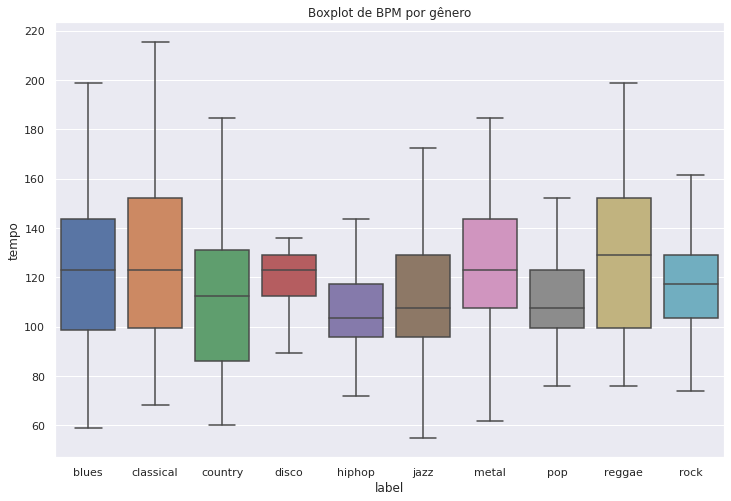

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data = csvDataFrame, x = 'label', y = 'tempo', showfliers = False)
plt.title('Boxplot de BPM por gênero')
plt.show()

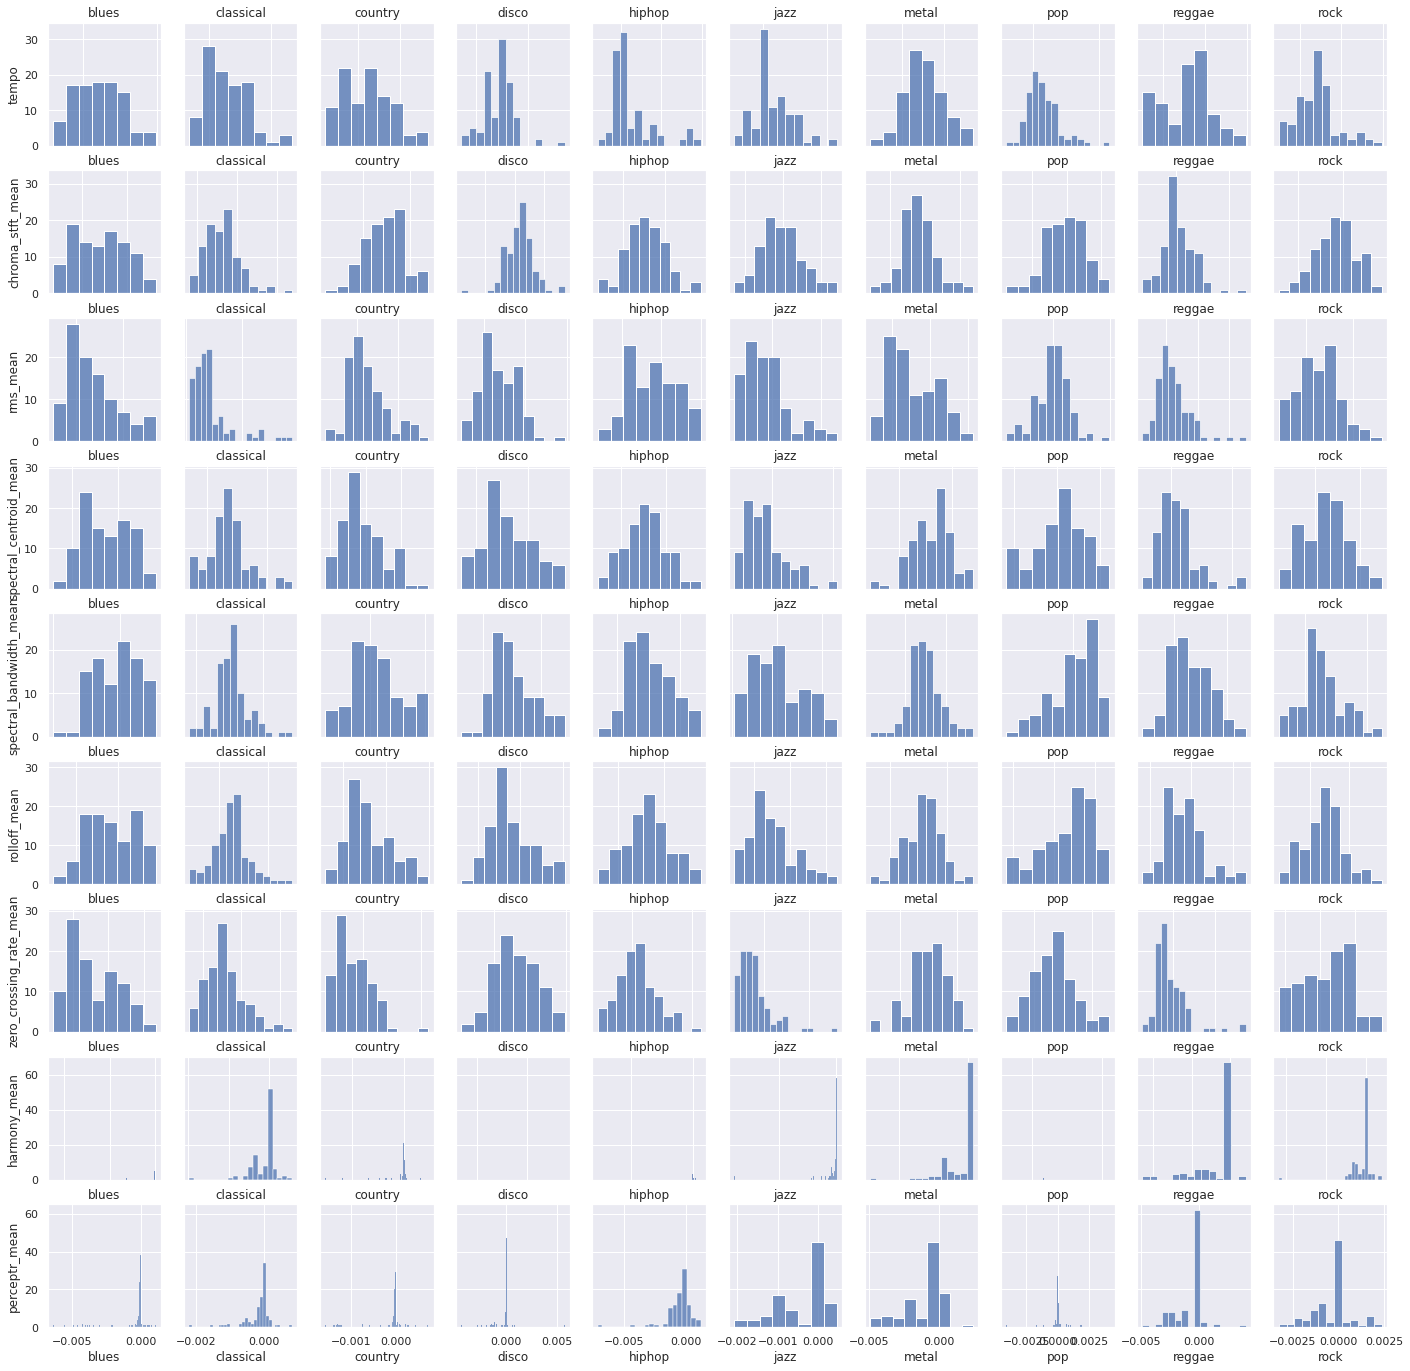

In [ ]:
fig, axs = plt.subplots(len(cols[:9]), len(csvDataFrame.label.unique()), figsize = (24, 24), sharey='row')

for x, measure in enumerate(cols[:9]):
  for y, label in enumerate(csvDataFrame.label.unique()):
    sns.histplot(data=csvDataFrame[csvDataFrame['label'] == label], x=measure, ax=axs[x, y])
    axs[x, y].set_title(label)
    axs[x, y].set(xlabel=label, ylabel=measure)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

---
**PERGUNTA - Qual a relação das características entre si e com a variável alvo? Elas estão correlacionadas?**:  
  Para avaliar a relação das características quantitativas utilizou-se uma matriz de histogramas. Desta forma foi possível observar que as varíaveis perfis de distribuição bastante distintos entre os gêneros. 
  
  Para avaliar a relação entre as variáveis foi utilizado o visual de matriz de correlação com base na correlação de spearman. Foi possível observar que as variáveis com maior correlação entre as outras são: spectral_centroid_mean, spectral_bandwidth_mean , rollof_mean e zero_crossing_rate_mean.

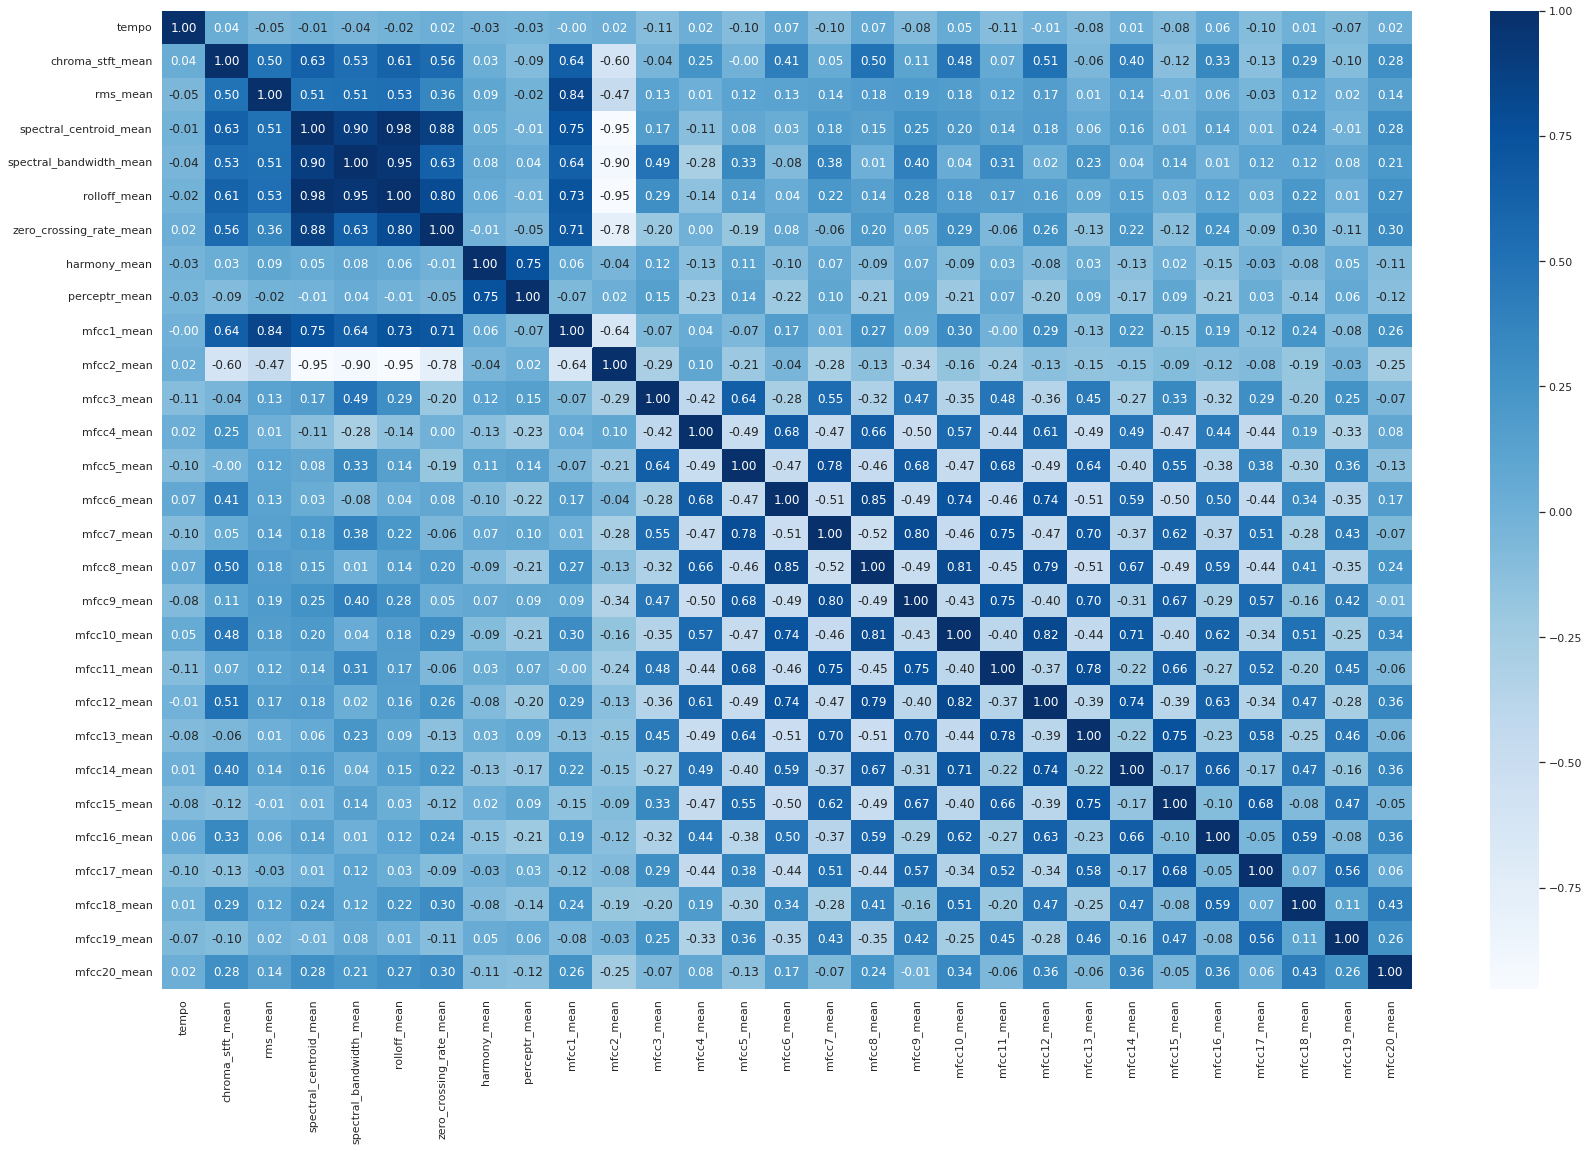

In [ ]:
plt.figure(figsize=(28,18))
sns.heatmap(data = csvDataFrame[cols].corr('spearman'), cmap = 'Blues', annot = True, fmt="0.2f")
plt.show()

### 4. **Separação de dados de treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features = csvDataFrame.columns.drop(['filename','label'])

---
**PERGUNTA - Já há uma divisão entre treino/validação/teste?**:  
  Os dados não vieram previamente separados. Portanto, a separação entre os sets de treino, validação e teste foram feitas manualmente 




In [ ]:
X_model, X_test, y_model, y_test = \
  train_test_split(
      csvDataFrame[features],
      csvDataFrame['label'], 
      test_size=.05, 
      random_state = 42
  )

X_train, X_val, y_train, y_val = \
  train_test_split(
      X_model,
      y_model, 
      test_size=.15, 
      random_state = 42
  )
  

---
**PERGUNTA - É um problema desbalanceado?**: 

Para o problema proposto, nota-se que as classes no treino estão bem distribuídas entre si. Assim, não identifica-se um problema desbalanceado

In [ ]:
X_train.index

Int64Index([374, 853, 965, 365, 388, 246, 234, 232, 514, 142,
            ...
            479, 111, 107, 624, 425, 309,  79, 821,  43, 977],
           dtype='int64', length=807)

In [ ]:
y_train.value_counts(normalize = True)

blues        0.109046
hiphop       0.106568
country      0.102850
jazz         0.100372
pop          0.099133
rock         0.097893
disco        0.097893
classical    0.097893
reggae       0.094176
metal        0.094176
Name: label, dtype: float64

---
**PERGUNTA - Os dados precisarão de algum tipo de pré-processamento?**: 

No caso do arquivo csv será necessário realizar apenas a normalização pois nosso baseline trata-se de uma SVM. Para os arquivos de imagem, é necessário fazer a extração de cores por pixel. Por fim, no caso dos arquivos de áudio, é necessário convertê-los em alguma forma interpretável como uma sequência de inteiros por frame da música.

### 5. **Implementação do Baseline**

Como Baseline, optou-se pelo uso de uma SVM para classificação. No caso, não foram implementadas otimizações de hiperparâmetros. A escolha da SVM foi feita pois o número de amostras disponíveis não é alto e dito algoritmo é robusto a um alto número de features

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
clfBaseline = SVC()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

scaledXtrain = scaler.transform(X_train)
scaledXval = scaler.transform(X_val)

In [ ]:
clfBaseline.fit(scaledXtrain, y_train)

SVC()

---
**PERGUNTA - Quais as métricas utilizadas neste problema? Acurácia, erro, MSRE, etc.? O que elas significam?**: 

Para o problema proposto é possível a aplicação de métricas como acurácia balanceada, recall, precisão e f1-score. O significado de cada uma é apresentado abaixo:

1.   Acurácia: Média de TP/(TP + TN + FP + FN) entre as classes
2.   Recall: TP / FN + TP
3.   Precisão: TP / TP + FP
4.   F1-Score: Média harmônica de recall e precisão



In [ ]:
resultados = clfBaseline.predict(scaledXval)
print(metrics.classification_report(y_val,resultados))

              precision    recall  f1-score   support

       blues       0.67      0.89      0.76         9
   classical       0.88      0.88      0.88        16
     country       0.67      0.83      0.74        12
       disco       0.89      0.53      0.67        15
      hiphop       0.83      0.45      0.59        11
        jazz       0.79      0.79      0.79        14
       metal       0.88      0.88      0.88        17
         pop       0.80      0.71      0.75        17
      reggae       0.61      0.74      0.67        19
        rock       0.38      0.46      0.41        13

    accuracy                           0.72       143
   macro avg       0.74      0.72      0.71       143
weighted avg       0.75      0.72      0.72       143



In [ ]:
print(metrics.balanced_accuracy_score(y_val,resultados))

0.7157431156734562


Avaliando os resultados acima, nota-se um resultado muito satisfatório para o Baseline. As métricas de acurácia, recall e precisão ficaram em torno de ~0.7 o que é muito positivo dado o grau de complexidade limitado para o modelo.

### 6. **Baseline com Rede Convolucional**

In [ ]:
X_train.index

Int64Index([374, 853, 965, 365, 388, 246, 234, 232, 514, 142,
            ...
            479, 111, 107, 624, 425, 309,  79, 821,  43, 977],
           dtype='int64', length=807)

In [ ]:
folder_path = '/content/dataset/Data/images_original/'
genre_folders = os.listdir(folder_path)

In [ ]:
import imageio

file_values = []

for genre_folder in genre_folders[:1]:
  
  files = os.listdir(folder_path + genre_folder)
  print(genre_folder, len(files))
  
  for image in files:
    im = imageio.imread(folder_path + genre_folder+ "/" +image)
    file_values.append(im)


rock 100


In [ ]:
file_values[1]

Array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

Populating the interactive namespace from numpy and matplotlib


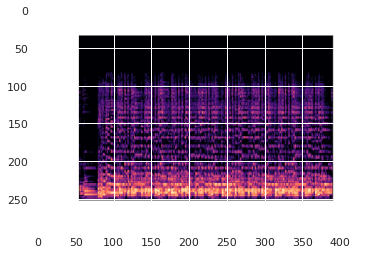

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(file_values[2])
plt.show()

In [ ]:
MobileNet para baseline de imagem
YAMNet para wav

In [ ]:
wavDataFrame

,audio_name,wav_values,target
0,rock.00062.wav,"[2052, 1960, 1902, 1968, 1754, 2107, 2050, 140...",rock
1,rock.00018.wav,"[-2168, -2797, 245, 706, 2142, 2230, -227, 887...",rock
2,rock.00067.wav,"[-1384, -2353, -1736, -1098, -403, -185, -704,...",rock
3,rock.00012.wav,"[-199, 472, 1530, 2085, 1328, -515, -865, -116...",rock
4,rock.00006.wav,"[3672, 5951, 5457, 5836, 6079, 6006, 5881, 532...",rock
...,...,...,...
994,disco.00009.wav,"[2356, 438, -216, 957, 1508, 1023, 3184, 5564,...",disco
995,disco.00045.wav,"[2578, 3946, 4752, 3153, 439, -1629, -3485, -4...",disco
996,disco.00008.wav,"[659, 699, 791, 11, 1263, 1718, 1358, 1817, 20...",disco
997,disco.00026.wav,"[-773, 1014, -47, 336, 3500, 653, 2254, 1918, ...",disco


In [ ]:
import PIL.Image

rgb_image = file_values.convert('RGB')

AttributeError: ignored